In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import torchvision.datasets as datasets
import warnings
warnings.filterwarnings(action='ignore')

trainset = datasets.MNIST(root='./data', train=True, download=False)
testset = datasets.MNIST(root='./data', train=False, download=False)

X_train, y_train = trainset.data.numpy().reshape(-1,28*28), trainset.targets.numpy()
X_test, y_test = testset.data.numpy().reshape(-1,28*28), testset.targets.numpy()

X = {'train':X_train, 'test':X_test}
y = {'train':y_train, 'test':y_test}

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(random_state=2022)
rnd_clf = RandomForestClassifier(random_state=2022)
svm_clf = SVC(random_state=2022)

hardvoting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
hardvoting_clf.fit(X_train, y_train)

c:\Users\DMQA\anaconda3\envs\py38cuda102\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=2022)),
                             ('rf', RandomForestClassifier(random_state=2022)),
                             ('svc', SVC(random_state=2022))])

In [10]:
for clf in (log_clf, rnd_clf, svm_clf, hardvoting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

c:\Users\DMQA\anaconda3\envs\py38cuda102\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.9255
RandomForestClassifier 0.969
SVC 0.9792


c:\Users\DMQA\anaconda3\envs\py38cuda102\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.9709


In [11]:
log_clf = LogisticRegression(random_state=2022)
rnd_clf = RandomForestClassifier(random_state=2022)
svm_clf = SVC(probability=True, random_state=2022)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

c:\Users\DMQA\anaconda3\envs\py38cuda102\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=2022)),
                             ('rf', RandomForestClassifier(random_state=2022)),
                             ('svc', SVC(probability=True, random_state=2022))],
                 voting='soft')

In [12]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

c:\Users\DMQA\anaconda3\envs\py38cuda102\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.9255
RandomForestClassifier 0.969
SVC 0.9792


c:\Users\DMQA\anaconda3\envs\py38cuda102\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.9718


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


tree_clf = DecisionTreeClassifier(random_state=2022)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print('DecisionTree Accuracy =', accuracy_score(y_test, y_pred_tree))

# Random Forest
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=2022)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print('RandomForest Accuracy =', accuracy_score(y_test, y_pred_rf))


DecisionTree Accuracy = 0.8793
RandomForest Accuracy = 0.8278


In [16]:
from sklearn.model_selection import GridSearchCV

temp_list = list(range(1,10))
temp_list.append(None)
params = {
    'n_estimators' : tuple(range(50, 501, 50)),
    'max_depth' : tuple(temp_list),
    'min_samples_leaf' : tuple(map(lambda x: 2**x, range(5))),
    'min_samples_split' : tuple(map(lambda x: 2**x, range(5)))
}

rf_run = RandomForestClassifier(random_state=2022, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
최적 예측 정확도: 0.9643


In [17]:
rf_run = RandomForestClassifier(random_state=2022, 
                               max_depth=grid_cv.best_params_.get('max_depth'),
                               min_samples_leaf=grid_cv.best_params_.get('min_samples_leaf'),
                               min_samples_split=grid_cv.best_params_.get('min_samples_split'),
                               n_estimators=grid_cv.best_params_.get('n_estimators'),
                               )

rf_run.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=2022)

In [18]:
y_pred_rf = rf_run.predict(X_test)
print('RandomForest with grid search Accuracy =', accuracy_score(y_test, y_pred_rf))

RandomForest with grid search Accuracy = 0.9709


In [19]:
import matplotlib
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.hot,
               interpolation="nearest")
    plt.axis("off")

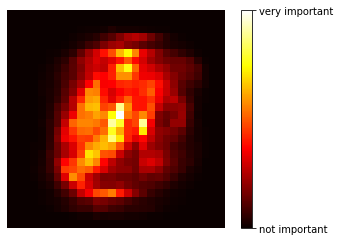

In [20]:
plot_digit(rf_run.feature_importances_)

cbar = plt.colorbar(ticks=[rf_run.feature_importances_.min(), rf_run.feature_importances_.max()])
cbar.ax.set_yticklabels(['not important', 'very important'])

plt.show()